# Reading and Plotting LTSpice Output in Python

_Version of 2022-09-24_

This is a demo of the ltspy module. It makes plot of $I_D$ versus $V_{DS}$ for different values of $V_{GS}$ of a MOS transistor that is simulated using spice.

It is written for students who are learning Python simultaneously.

In the first part of this tutorial, we explore the basic functionality. In the second part, we will learn more Python and matplotlib features for even nicer results.

This tutorial can run in Google Colab or locally in Jupyter.

## 1. Basic Functionality



If you do this on colab, you first need to upload some files to your temporary session store. (Or use google drive or even other methods, but these are outside of the scope of this tutorial.)

There is no need to do this when you run locally in Jupyter and the files are in the working directory (current folder).

Rather than this upload, you could also use the file explorer on Colab in the left pane, as was shown in the [Colab introduction for EE](https://colab.research.google.com/drive/1lzIebMPmYmEqBjZwVQf46DxMBv8qd3bD?usp=sharing).

There is no need to mind the `try: ... except` construct, it prevents an error if it is not on Google Colab. 

In [1]:
# only on google colab
try:
    from google.colab import files
    uploaded = files.upload()
except ModuleNotFoundError:
    pass


Then, you will get an upload box as follows:
![colab-upload.png](attachment:colab-upload.png)

Select the following files: `nmosid.raw nmosid.log ltspy.py`. They are in the ltspy.zip file on Brightspace.

The files `nmosid.raw` and `nmosid.log` are created by ltspice. They contain the output data.

Check that you indeed uploaded those files:

In [2]:
# only on google colab
# only on google colab
try:
   print (uploaded.keys())
except NameError:
    pass

First, load the `ltspy` module and the part from `matplotlib.pyplot` module that we will need.

In [3]:
import matplotlib.pyplot as plt
import ltspy

Now, we want to analyse the simulator output that is available in the file `nmosid.raw`. We can load that file into python as follows. Note that we have assigned the name of our file to the variable `filename`. Such practice can help if we later need access to the filename again.

Note that while we only seem to load `nmosid.raw`, ltspy will also read `nmosid.log` if it is available. If it is not available, its functionality might be reduced.

In [4]:
filename = "nmosid.raw"
simdata = ltspy.SimData (filename)

Now, `simdata` is what is called a `class` in Python. 
A class contains other data and functions that can be accessed using the . dot notation. See [Classes and Objects](https://colab.research.google.com/drive/1V1YcVmBtX7yCfl2jaARgOk4gUVzmjjiY?usp=sharing), a new tutorial in the Python for EE tutorial.
The `simdata` class can show a summary of what is in the file as follows.

In [5]:

print (simdata.summary())

Command: Linear Technology Corporation LTspice XVII
File: nmosid.raw
Title: * /Users/nick/data/work/Courses/gs/lab/ltspice/vdsat/nmosid.asc
Date: Thu Oct 15 21:33:04 2020
Plotname: DC transfer characteristic
No. variables: 9
Variables: ['vds', 'V(n001)', 'V(n002)', 'Id(M1)', 'Ig(M1)', 'Ib(M1)', 'Is(M1)', 'I(Vds)', 'I(Vgs)']
Variables Types: ['voltage', 'voltage', 'voltage', 'device_current', 'device_current', 'device_current', 'device_current', 'device_current', 'device_current']
No. points: 455
Offset: 0.0
Output: None
Binary: True
Analysis: dc
Flags: ['real', 'forward', 'stepped']
Steplengths: [91 91 91 91 91]
Number of steps: 5
Step variables: ['vgs']
Step values: [array([0.6, 0.9, 1.2, 1.5, 1.8])]



The above output shows a lot. Note the lines `Variables:` and `Variable Types:`.
They list the simulation output data that is available, in the notation of a Python array. Thus $V_{DS}$ is available in position 1, and $I_{D_{M1}}$ (the drain current of transistor $M_1$) is available in position 4.

It also shows that the simulation is a so-called _stepped simulation_. 
In particular, the $V_{GS}$ is stepped, subsequently taking on the values listed as `step values:`. This is a list of lists (or array of arrays), since it allows for multiple variables to be stepped simultaneously.

Rather than using `simdata.summary ()` one could also do this instead:

In [6]:
print ("Variables:", simdata.variables)
print ("Step values:", simdata.stepvalues)

Variables: [b'vds', b'V(n001)', b'V(n002)', b'Id(M1)', b'Ig(M1)', b'Ib(M1)', b'Is(M1)', b'I(Vds)', b'I(Vgs)']
Step values: [array([0.6, 0.9, 1.2, 1.5, 1.8])]


The `b'string'` notation of the `simdata.variables` list is revealing something about the inner workings of the `ltspy` module. No need to know that now.

Let's now plot $I_D$ as a function of $V_{DS}$ for the case that $V_{GS}$ is 1.5 V. 

First, prepare three variables that we will use to access the right data in `simdata`.

In [7]:
step = 3      # the position of vgs = 1.5 in the `Stepvalues` list of lists
vds_index = 0 # the position of vds in the `Variables` list
id_index = 3  # the position of the drain current

Then, we can access the actual simulation data using `simdata.values[variable_index][step_number]`.
Here, a one-dimensional array of values is returned, which one is selected by the `variable_index` and `step_number`. 
For our purposes, `step_number` will be 3, as that corresponds to the position of 1.5 V in `step_values`.
Also, variable_index would be 1 for vds and 3 for id, as is shown in `simdata.variables`. 

If there was no stepping in spice, use `simdata.values[variable_index]` without the `[step_number]` index.

We can than directly plot as follows.

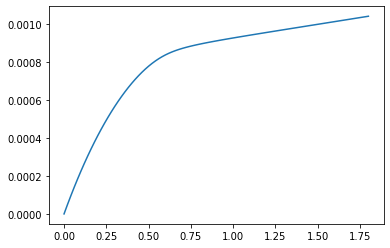

In [8]:
plt.plot (simdata.values[vds_index][step], simdata.values[3][step]);


We have place a semicolon ; at the end of the previous command, it will supress a spurious line of output.
(Note that by default, the result of the final line in a cell is printed.)
We don't need any printed output, because we already have the graph as output.
Please see what happens if you remove the semicolon.

So far, so good. Let's now plot all curves (for all vgs steps) together. We need a loop:

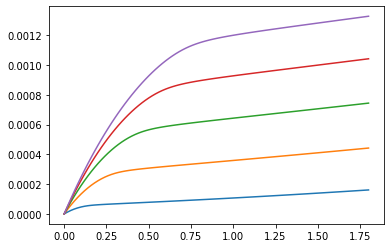

In [9]:
for s in range(simdata.nosteps):
    plt.plot (simdata.values[vds_index][s], simdata.values[id_index][s])

This could be sufficient if you are just experimenting. But if you want a graph in your report, you need to decorate and beautify it a bit. Here we go. 

We first place a label, the label is composed of three strings that are pasted together with `+`. In general, don't forget to add units, hence the `+ " V"` part of the label. The label is given to `plt.plot ()` as an optional argument. Finally, the legend is located in the top-left corner.

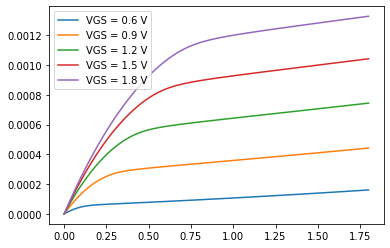

In [10]:
for s in range(simdata.nosteps):
    label = "VGS = " + str(simdata.stepvalues[0][s]) + " V"
    plt.plot (simdata.values[vds_index][s], simdata.values[id_index][s], label = label)
plt.legend(loc="upper left");

We can also place axes labels and a title. We multiply the vertical values by 1000 for nicer numbers in mA.
Let us also make sure that the axes start at zero. We only need to fix the lower limit of the axes. See https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html

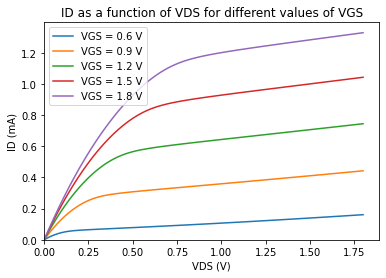

In [11]:
for s in range(simdata.nosteps):
    label = "VGS = " + str(simdata.stepvalues[0][s]) + " V"
    plt.plot (simdata.values[vds_index][s], simdata.values[id_index][s]*1000, label = label)
plt.legend(loc="upper left")
plt.xlabel("VDS (V)")
plt.ylabel("ID (mA)")
plt.title("ID as a function of VDS for different values of VGS");

axes = plt.gca()
axes.set_ylim([0, None])
axes.set_xlim([0, None]);

## 2. Matplotlib LaTeX formatting with Python F-strings
Python also knows other ways of formatting a string. So-called f-strings are rather flexible and convenient.

F-strings are '' or "" strings preceded by f: f'this is an f-string'.
F-strings can embed variables that are placed between {}, 
and its value or the expression within will be printed. 
If you need {} in the output, double them {{}}.
Example:

In [12]:
a = 42
string = f'The answer is {a} {{and half its value is {a/2}}}'
print (string)

The answer is 42 {and half its value is 21.0}


You may want to play with the example by removing the `f` before the `' ... '`. Then, the literal string is printed. The `f` in front of it gives the string its power of interpolating python values and code. 

A good explanation of f-strings can be found here: https://realpython.com/python-f-strings/

Now, a nice matplotlib trick is that it can use LaTeX $$ notation for mathematics. Let us use this for subscript notation on the annotation of the graph.

We can then save it, using savefig. We reuse the filename variable that we started with, and add ".pdf". Then, an `nmosid.raw.pdf` file is created that can nicely be included in a report. Saving the figure should be done before the graph is generated on the screen.

Before everything else, we might want to adjust the size of the text (font size). Adjust depending on your needs. The correct setting will depend on how big you print the graph in your report. Normally, font size in graphs should match the font size of the document.

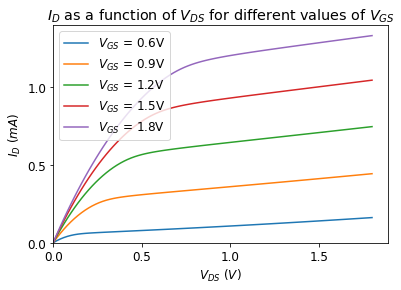

In [13]:
plt.rcParams['font.size']='12' # setting the text font size.

for s in range(simdata.nosteps):
    label = f'$V_{{GS}}$ = {simdata.stepvalues[0][s]}V'
    plt.plot (simdata.values[vds_index][s], simdata.values[id_index][s]*1000, label = label)
plt.legend(loc="upper left")
plt.xlabel(f'$V_{{DS}}~(V)$')
plt.ylabel(f'$I_{{D}}~(mA)$')
plt.title(f'$I_D$ as a function of $V_{{DS}}$ for different values of $V_{{GS}}$')

axes = plt.gca()
axes.set_ylim([0, None])
axes.set_xlim([0, None])
plt.savefig(filename + ".pdf")
plt.rcParams['font.size']='20' 

If you run on Colab, the `nmosid.raw.pdf` file is stored in temporary session storage. You can download it using the code below. Alternatively, use the `files panel` on the left.

In [14]:
# only on google colab
try:
    from google.colab import files
    files.download(filename + ".pdf")
except ModuleNotFoundError:
    pass

# 3. Conclusion
This concludes this tutorial.

It wil be among your tasks to write Python code that can do the things from the lab, such as finding the proper value of $V_T$.

It is convenient to do this in Colab or locally in Jupyter. You might want to organize your notebooks carefully, maybe with one notebook for each parameter.

Note that if you run on colab, you will probably need to upload your simulation output files multiple times. Typically, you run a simulation, analyse the result and see that you need to tweak the simulation, run again, and so on. Then, you would only need to re-upload the `.raw` and `.log` file outputs of `ltspice`, not again the `ltspy.py` module.

Alternatively, you can work with `pycharm` or other IDEs; then I recommend that you write functions/modules to do the work of extracting parameters.

Both the notebook and function methods have the advantage that steps can be easily repeated and tweaked, until you are satisfied. And then, all the steps are documented in the notebook (or the function).

Good luck and enjoy!